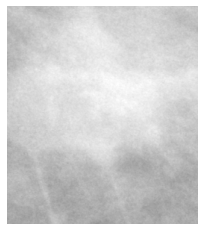

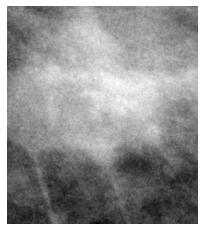

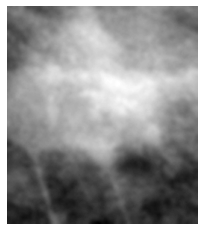

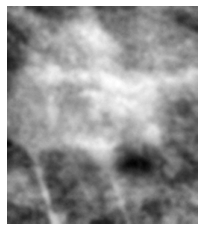

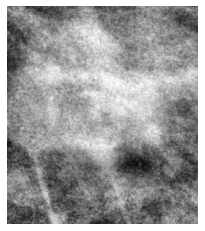

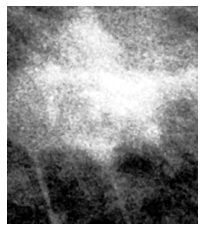

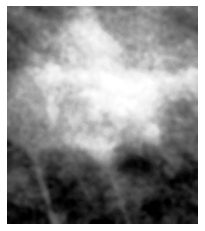

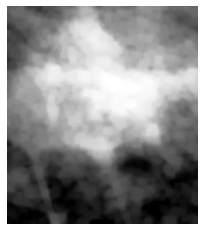

In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from to_8_bit_png import apply_windowing
test_pic1 = "..\\..\\datasets\\image\\ROI_training_png\\Mass-Training_P_00001_LEFT_CC_1-1-2.png"
test_pic2 = "..\\..\\datasets\\image\\ROI_training_png\\Mass-Training_P_00001_LEFT_MLO_1-1-1.png"

imgRGB = cv2.imread(test_pic2)
plt.imshow(imgRGB, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

img = cv2.imread(test_pic2,cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

img_bil = cv2.bilateralFilter(img, 9, 150, 150)
plt.imshow(img_bil, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

# img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# plt.imshow(img, cmap='gray')
# plt.axis('off')  # Turn off axis labels
# plt.show()

def CLAHE_RGB(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(4,4))
    img[:,:,0] = clahe.apply(img[:,:,0])
    cl_img = cv2.cvtColor(img, cv2.COLOR_LAB2BGR)

    return cl_img

def CLAHE(img):
    equ = cv2.equalizeHist(img)
    clahe = cv2.createCLAHE(clipLimit =3.0, tileGridSize=(4,4))
    cl_img = clahe.apply(img)
    ret, thresh3 = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return cl_img

def mod(im):
    # im = cv2.imread(img,0)
    img_hist = cv2.equalizeHist(im)
    gaussian_3 = cv2.GaussianBlur(img_hist, (0, 0), 2.0)
    unsharp_image = cv2.addWeighted(img_hist, 2.0, gaussian_3, -1.0, 0)
    median_image = cv2.medianBlur(unsharp_image, 3)
    return median_image

img_cla = CLAHE(img_bil)
plt.imshow(img_cla, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

img_cla = CLAHE(img)
plt.imshow(img_cla, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

img_mod = mod(img)
plt.imshow(img_mod, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

img_mod = mod(img_bil)
plt.imshow(img_mod, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

kernel = np.ones((7,7),np.uint8)
img_open = cv2.morphologyEx(img_mod, cv2.MORPH_OPEN, kernel)
plt.imshow(img_open, cmap='gray')
plt.axis('off')
plt.show()